In [1]:
config='CALEDO60'
case='TRPC12N00'
year='2012'
plots_surf=False
plot_eke=True
plot_rms=True
plot_psi=True
plots_100m=True
plots_1000m=True

In [2]:
# Parameters
config = "TROPICO12"
case = "TRPC12N00"
year = "2012"
plots_surf = False
plot_eke = True
plot_rms = True
plot_psi = True
plots_100m = True
plots_1000m = True


In [3]:
# General and file management
import numpy as np
import numpy.ma as ma
import xarray as xr
from netCDF4 import Dataset
import dask.array as da

#For the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker

import cartopy
cartopy.config['pre_existing_data_dir'] = '/scratch/cnt0024/hmg2840/albert7a/DEV/git/cartopy_data'
import cartopy.crs as ccrs
import cmocean

import warnings
warnings.filterwarnings('ignore')

#Jupyter magics
%matplotlib inline

In [4]:
# Request ressource
import multiprocessing.popen_spawn_posix
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
c = Client(cluster)
c

Client Scheduler: tcp://127.0.0.1:42200 Dashboard: http://127.0.0.1:42653/status,Cluster Workers: 8 Cores: 56 Memory: 270.19 GB


In [5]:
# Open grid and mask
if config == 'CALEDO60':
    dscoord=xr.open_dataset('/store/brodeau/TROPICO12/TROPICO12.L125-I/NST/1_coordinates_TROPICO12.nc')
    dsmask=xr.open_dataset('/store/brodeau/TROPICO12/TROPICO12.L125-I/NST/1_mesh_mask_TROPICO12_L125_tr21.nc',drop_variables={'x','y'})
if config == 'TROPICO12':
    dscoord=xr.open_dataset('/store/brodeau/TROPICO12/TROPICO12.L125-I/coordinates_TROPICO12.nc')
    dsmask=xr.open_dataset('/store/brodeau/TROPICO12/TROPICO12.L125-I/mesh_mask_TROPICO12_L125_tr21_UPDATED.nc',drop_variables={'x','y'})


In [6]:
# Generic plot 
def plot_surf(var,cmap,vmin,vmax,label,title,savename):
    cm = 180
    proj = ccrs.PlateCarree(central_longitude=cm)
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    ax.coastlines()
    if config == 'CALEDO60':
        ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), xlocs=[158,160,162,164,166,168,170,172])
    if config == 'TROPICO12':
        ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), xlocs=[120,140,160,180,200,220,240,260,280])
        ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), xlocs=[120,140,160,180,-160,-140,-120,-100,-80])
    cs = plt.pcolormesh(dscoord.nav_lon-cm, dscoord.nav_lat, var,transform=proj,cmap=cmap,
                    vmin=vmin,vmax=vmax)
    cbar = plt.colorbar(cs,orientation='vertical',shrink=0.5,label='deg C')
    ax.set_title(title)
    plt.tight_layout()
    plt.savefig('plots/'+savename+'.png', bbox_inches='tight')

In [7]:
# Make plots of every surface mean fields
if plots_surf:
    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_gridT-2D.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.tos[0]
    tmask_surf=dsmask.tmask[0,0]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(tmeansurf_mask, cmocean.cm.thermal,10,30,'deg C',
                      config+'-'+case+' Mean surface temperature '+year,config+'-'+case+'_yearly_mean_surface_temp_y'+year)

    smean_surf=ds.sos[0]
    smeansurf_mask=ma.masked_where(tmask_surf==0.,smean_surf)
    plot_surf(smeansurf_mask, cmocean.cm.haline,34,36,'PSU',
                      config+'-'+case+' Mean surface salinity '+year,config+'-'+case+'_yearly_mean_surface_salt_y'+year)

    mldmean=ds.mldr10_1[0]
    mldmean_mask=ma.masked_where(tmask_surf==0.,mldmean)
    plot_surf(mldmean_mask, cmocean.cm.deep,0,200,'m',
                      config+'-'+case+' Mean mixed layer depth '+year,config+'-'+case+'_yearly_mean_mld_y'+year)

    sshmean=ds.zos[0]
    sshmean_mask=ma.masked_where(tmask_surf==0.,sshmean)
    plot_surf(sshmean_mask, cmocean.cm.balance,0,1,'m',
                      config+'-'+case+' Mean sea surface height '+year,config+'-'+case+'_yearly_mean_ssh_y'+year)

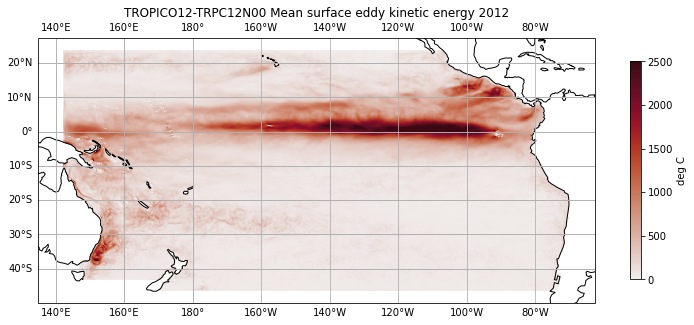

In [8]:
# Make plots of every surface mean fields
if plot_eke:
    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_EKE.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.voeke[0,0]
    tmask_surf=dsmask.tmask[0,0]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(10000*tmeansurf_mask, cmocean.cm.amp,0,2500,'1e4m2s',
              config+'-'+case+' Mean surface eddy kinetic energy '+year,
              config+'-'+case+'_yearly_mean_surface_eke_y'+year)

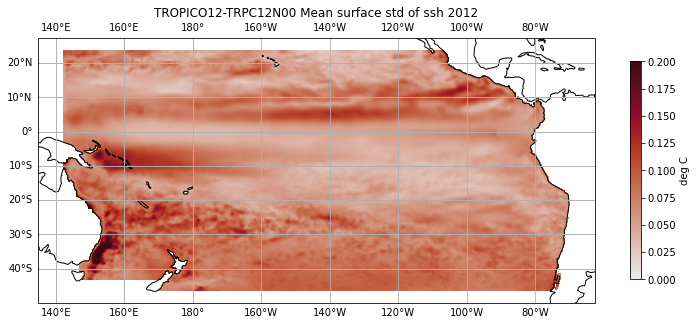

In [9]:
# Make plots of every surface mean fields
if plot_rms:
    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_RMSSSH.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.zos_rms[0]
    tmask_surf=dsmask.tmask[0,0]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(tmeansurf_mask, cmocean.cm.amp,0,0.2,'m',
              config+'-'+case+' Mean surface std of ssh '+year,
              config+'-'+case+'_yearly_mean_rmsssh_y'+year)

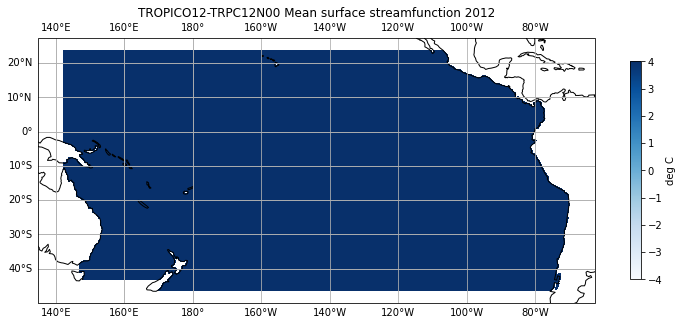

In [10]:
# Make plots of every surface mean fields
if plot_psi:
    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_PSI.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.sobarstf[0]
    tmask_surf=dsmask.tmask[0,0]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(1e-7*tmeansurf_mask, 'Blues',-4,4,'',
              config+'-'+case+' Mean surface streamfunction '+year,
              config+'-'+case+'_yearly_mean_surface_psi_y'+year)

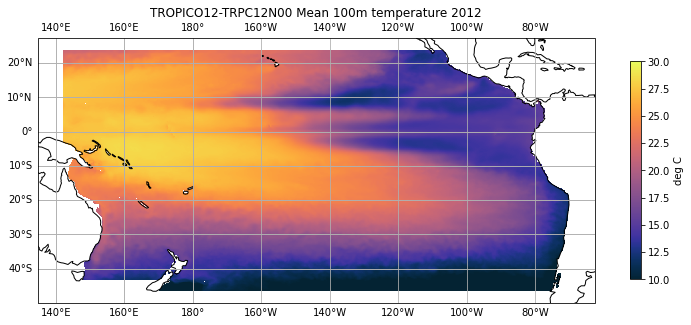

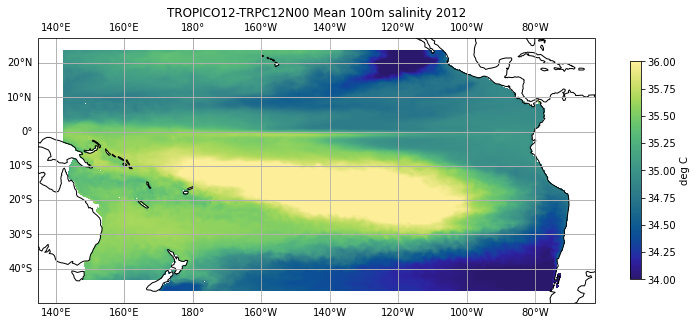

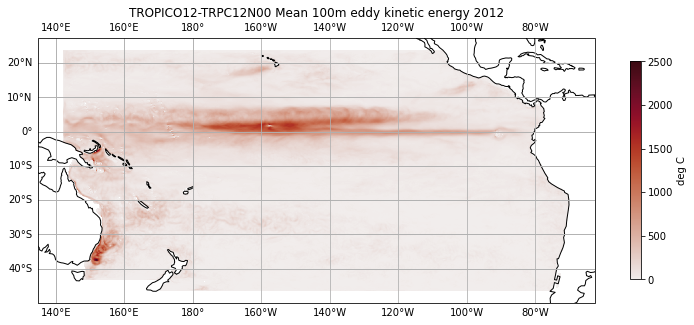

In [11]:
# Make plots of every surface mean fields
if plots_100m:
    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_gridT.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.thetao[0,42]
    tmask_surf=dsmask.tmask[0,42]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(tmeansurf_mask, cmocean.cm.thermal,10,30,'deg C',
              config+'-'+case+' Mean 100m temperature '+year,
              config+'-'+case+'_yearly_100m_surface_temp_y'+year)

    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_gridS.nc',chunks={'x':1000,'y':500})
    smean_surf=ds.so[0,42]
    smeansurf_mask=ma.masked_where(tmask_surf==0.,smean_surf)
    plot_surf(smeansurf_mask, cmocean.cm.haline,34,36,'PSU',
              config+'-'+case+' Mean 100m salinity '+year,
              config+'-'+case+'_yearly_mean_100m_salt_y'+year)

    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_EKE.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.voeke[0,42]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(10000*tmeansurf_mask, cmocean.cm.amp,0,2500,'1e4m2s',
              config+'-'+case+' Mean 100m eddy kinetic energy '+year,
              config+'-'+case+'_yearly_mean_100m_eke_y'+year)

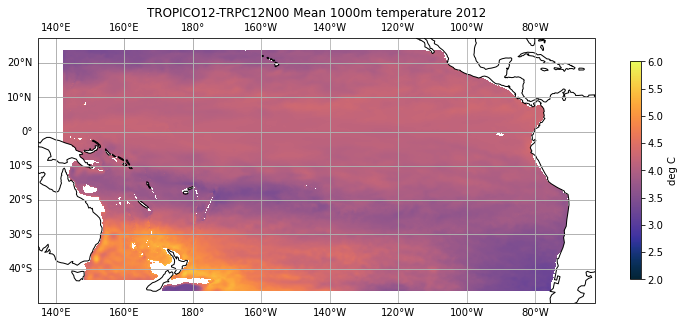

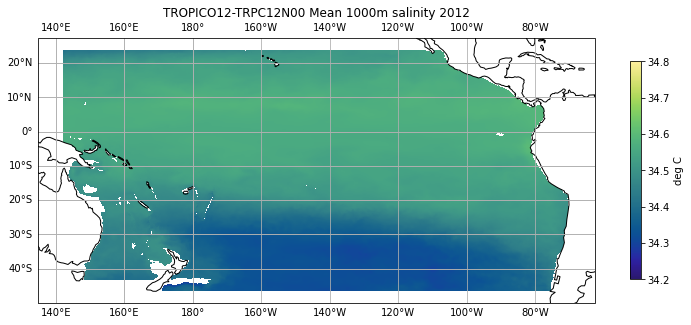

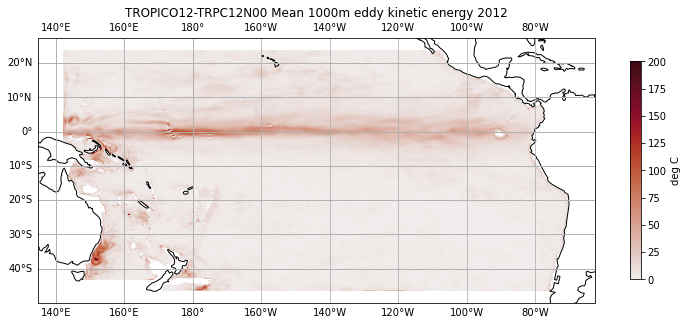

In [12]:
# Make plots of every surface mean fields
if plots_1000m:
    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_gridT.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.thetao[0,75]
    tmask_surf=dsmask.tmask[0,75]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(tmeansurf_mask, cmocean.cm.thermal,2,6,'deg C',
              config+'-'+case+' Mean 1000m temperature '+year,
              config+'-'+case+'_yearly_1000m_surface_temp_y'+year)

    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_gridS.nc',chunks={'x':1000,'y':500})
    smean_surf=ds.so[0,75]
    smeansurf_mask=ma.masked_where(tmask_surf==0.,smean_surf)
    plot_surf(smeansurf_mask, cmocean.cm.haline,34.2,34.8,'PSU',
              config+'-'+case+' Mean 1000m salinity '+year,
              config+'-'+case+'_yearly_mean_1000m_salt_y'+year)

    ds=xr.open_dataset('/scratch/cnt0024/ige2071/aalbert/'+config+'/'+config+'-'+case+'-MEAN/1y/'+year+'/'+config+'-'+case+'_1y_'+year+'_EKE.nc',chunks={'x':1000,'y':500})
    tmean_surf=ds.voeke[0,75]
    tmeansurf_mask=ma.masked_where(tmask_surf==0.,tmean_surf)
    plot_surf(10000*tmeansurf_mask, cmocean.cm.amp,0,200,'1e4m2s',
              config+'-'+case+' Mean 1000m eddy kinetic energy '+year,
              config+'-'+case+'_yearly_mean_1000m_eke_y'+year)